In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import csv

In [2]:
data1 = pd.read_csv('/Users/hmead/Desktop/BW2/General characteristics of people.csv', sep=';',engine='python', error_bad_lines=False, encoding= 'latin')
data2 = pd.read_csv('/Users/hmead/Desktop/BW2/Datos de la vivienda.csv', sep=';',engine='python', error_bad_lines=False, encoding= 'latin')
data3 = pd.read_csv('/Users/hmead/Desktop/BW2/Perception of security and coexistence.csv', sep=';',engine='python', error_bad_lines=False, encoding= 'latin')
data4 = pd.read_csv('/Users/hmead/Desktop/BW2/Percepciขn del aporte a la seguridad.csv', sep=';',engine='python', error_bad_lines=False, encoding= 'latin')

In [3]:
print(data1.shape)

general = data1.copy()
housing = data2.copy()
security = data3.copy()
contributions = data4.copy()

(218653, 16)


In [4]:
general_columns = {
            'ï»¿DIRECTORIO':'id', 'SECUENCIA_ENCUESTA':'survey_sequence','SECUENCIA_P':'sequence_p',
            'ORDEN':'order', 'P220' : 'sex', 'P5785': 'age', 'P5501':'relationship_to_head_of_household',
            'P6210':'education_level','P1366': 'relationship_status','P1402':'time_lived_in_city',
            'P1403':'time_lived_in_neighborhood','P1365': 'activity','P1364':'activity_location',
            'P1363': 'activity_time_of_day', 'FEX_C': 'gen_expansion'
              }

housing_columns = {
        'ï»¿DIRECTORIO':'id','SECUENCIA_ENCUESTA':'survey_sequence','SECUENCIA_P':'sequence_p',
        'ORDEN':'order', 'P5747': 'dwelling_type','P5752':'electricity_service', 
        'P5752S1':'social_stratum', 'P5090':'housing_status','DEPMUNI':'dept_muni',
        'FEX_C': 'housing_expansion'
          }

security_columns = {
          'ï»¿DIRECTORIO':'id','SECUENCIA_ENCUESTA':'survey_sequence','SECUENCIA_P':'sequence_p',
          'P1362':'general_safe_unsafe', 'P1359':'city_safe_unsafe', 'P1594': 'city_security_inc_dec_same',
          'P564':'will_be_victim_next_12_months', 'P562':'how_unsafe', 'P1356S1': 'activity_location_safe_unsafe', 
          'P1356S2':'public_parks_recreational_sports_spaces', 'P1356S3':'market_squares_shopping_streets', 
          'P1356S4': 'public_transportation', 'P1356S5':'ATMs', 'P1356S6':'public_roads', 'P1356S8':'pedestrian_bridges', 
          'P1356S7':'nightclubs_bars_entertainment_venues', 'P1116':'measures_taken', 'P1353S1':'justify_violence_family', 
          'P1353S2':'justify_violence_punishment', 'P1353S3':'justify_violence_self-defense',
          'P1117':'how_certain_will_be_victim_next_12_months', 
          'P1353S4':'justify_violence_infidelity', 'P1353S5':'justify_violence_defend_stranger', 
          'P1353S6':'justify_violence_defend_property', 'P1115': 'action_taken_as_witness', 'FEX_C': 'sec_expansion'
            }

contribution_to_security_columns = {
    'ï»¿DIRECTORIO':'id','SECUENCIA_ENCUESTA':'survey_sequence','SECUENCIA_P':'sequence_p',
    'P1182S1':'police_contribution', 'P1182S2':'military_contribution', 'P1182S3':'mayor_contribution',
    'P1771S1':'prosecutor_contribution', 'P1771S2':'judges_contribution' 
}

In [5]:
general = general.rename(columns = general_columns)
housing = housing.rename(columns = housing_columns)
security = security.rename(columns = security_columns)
contributions = contributions.rename(columns = contribution_to_security_columns)

print(general.shape)
print(housing.shape)
print(security.shape)
print(contributions.shape);

(218653, 16)
(64406, 10)
(168866, 49)
(168866, 16)


Housing dataset only has data from:

    'sequence_p' ==1        &
    'survey_sequence']==1

 Security dataset only has data from:
     'age' >14

In [6]:
condition1 = general['age']>14

condition2_g = general['sequence_p'] ==1
condition3_g = general['survey_sequence']==1

condition2 = security['sequence_p'] ==1
condition3 = security['survey_sequence']==1

# Apply conditions, in preparation for horizontal merge

general = general[condition1]
general = general[condition2_g]
general = general[condition3_g]

security = security[condition2]
security = security[condition3]

contributions = contributions[condition2]
contributions = contributions[condition3]
# Confirm rows

print(general.shape)
print(housing.shape)
print(security.shape)
print(contributions.shape);

(64406, 16)
(64406, 10)
(64406, 49)
(64406, 16)


<ipython-input-6-7dcdd152af4c>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  general = general[condition2_g]
<ipython-input-6-7dcdd152af4c>:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  general = general[condition3_g]
<ipython-input-6-7dcdd152af4c>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  security = security[condition3]
<ipython-input-6-7dcdd152af4c>:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  contributions = contributions[condition3]


In [7]:
# Drop Columns with lots of NaNs

general_drop_columns = ['P6210S1', 'gen_expansion', 'survey_sequence', 'sequence_p', 'order',
                       'activity_location', 'activity_time_of_day', 'relationship_to_head_of_household',]

housing_drop_columns = ['housing_expansion', 'survey_sequence', 'sequence_p','order', 'electricity_service']

security_drop_columns = ['how_unsafe','how_certain_will_be_victim_next_12_months',
                         'P1361S1','P1361S2','P1361S3','P1361S4','P1361S5','P1361S6',
                         'P1361S7','P1361S8','P1361S9', 'P563','P1358S1','P1358S10',
                         'P1358S2','P1358S3','P1358S4','P1358S5','P1358S6','P1358S7',
                         'P1361S1', 'P1361S2', 'P1361S3', 'P1361S4', 'survey_sequence',
                         'sequence_p','P1358S8', 'P1358S9', 'P1361S10','P1358S11', 
                          'P1361S10','sec_expansion','ORDEN']


contribution_drop_columns = ['survey_sequence', 'sequence_p', 'ORDEN', 'FEX_C',
                            'P1181S1', 'P1181S2', 'P1104', 'P1611', 'P1612', 'P1772']

In [8]:
general = general.drop(general_drop_columns, axis=1)

housing = housing.drop(housing_drop_columns, axis=1)

security = security.drop(security_drop_columns, axis=1)

contributions = contributions.drop(contribution_drop_columns, axis=1)

### MERGE INTO DAFAFRAME

In [9]:
# Merge into one dataframe

df = general.merge(housing, on='id').merge(security, on='id').merge(contributions, on='id')

pd.set_option('display.max_columns', None)

# Wrangling and Feature Engineering

In [10]:
import numpy as np

for col in df.columns:
    if len(df[col].unique()) == 1:
        df = df.drop(col,axis=1)

df = df.replace(' ', np.NaN)

df = df.drop(['id'], axis=1)

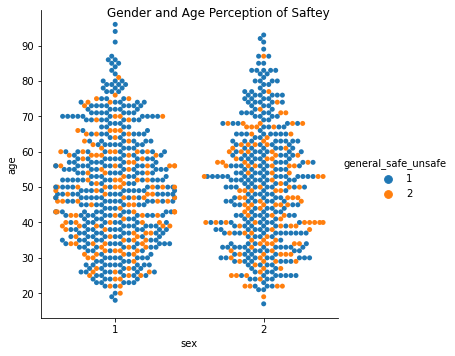

In [12]:
df4 = df.sample(n=1000)

import seaborn as sns
ax = sns.catplot(x="sex", y="age", hue="general_safe_unsafe", kind="swarm", data=df4)
ax.fig.suptitle('Gender and Age Perception of Saftey\n\n\n');

In [13]:
df.education_level = df.education_level.astype(int)

# engineer 'highly_educated' column

df['highly_educated'] = (df['education_level'] >= 5)

# cast education level as object to One Hot Encode 

df.education_level = df.education_level.replace([1,2,3,4,5,6,9], 
                                                ['None', 'Preschool', 'Basic elementary', 'Basic secondary', 
                                                 'Medium', 'Higher or university', np.NaN])

df = df.dropna()

In [14]:
df.social_stratum = df.social_stratum.replace(['8','9'], [np.NaN, np.NaN])
df = df.dropna()
df.social_stratum = df.social_stratum.astype(int)

In [15]:
# engineer 'income_group' feature

# build function

def assign_stratum(x):
    if x < 3:
        return 'lower'
    elif x < 5:
        return 'middle'
    else: 
        return 'upper'

df['income_group'] = df['social_stratum'].apply(assign_stratum)
df = df.dropna()

In [16]:
# relationship_status

df.relationship_status = df.relationship_status.replace(['1','2','3','4','5','6'],
                                                ['Not married, lived with partner for less than 2 years',
                                                 'Not married, lived with a partner for more than 2 years',
                                                 'Married',
                                                 'Widower',
                                                 'Separated or divorced',
                                                 'Single'])

In [17]:
# measures_taken

df.measures_taken = df.measures_taken.replace([1,2,3,4,5,6,7,8],
                                            ['Change your routine or activities',
                                             'Avoid going out at night',
                                             'Go out only when necessary, avoid going to public places',
                                             'Avoid going out alone',
                                             'Avoid talking to strangers',
                                             'Avoid carrying large amounts of money or valuables',
                                             'Other',
                                             'None'])

In [18]:
# activity

df.activity = df.activity.replace(['1','2','3','4','5','6','7','8'],
                                    ['Working',
                                    'Looking for work',
                                    'Studying',
                                    'Household duties ',
                                    'Permanently incapable of working',
                                    'Retired',
                                    'Leisure',
                                     np.NaN])

In [19]:
# action taken as witness

df.action_taken_as_witness = df.action_taken_as_witness.replace([1,2,3,4],
                                                               ["Come to the person's aid",
                                                                'Call for help',
                                                                'Run away',
                                                                'Do nothing'])

In [20]:
# engineer 'active_bystander' feature

def assign_bystander_status(x):
    if x == "Come to the person's aid" or x == 'Call for help':
        return True
    else: 
        return False

df['active_bystander'] = df.action_taken_as_witness.apply(assign_bystander_status)

In [21]:
# dwelling_type

df.dwelling_type = df.dwelling_type.replace([1,2,3,4], 
                                            ['House', 'Apartment', 'Room', 'Other'])

In [22]:
# engineer 'secure_housing' feature

def assign_housing_status(x):
    if x == "House" or x == 'Apartment':
        return True
    else: 
        return False
    
df['secure_housing'] = df.dwelling_type.apply(assign_housing_status)

In [23]:
# dept_muni

df.dept_muni = df.dept_muni.replace([5001, 
                                     8001,
                                     8758,
                                     11001,
                                     13001,
                                     15001,
                                     17001,
                                     19001,
                                     20001,
                                     23001,
                                     25754,
                                     27001,
                                     41001,
                                     44001,
                                     47001,
                                     50001,
                                     52001,
                                     54001,
                                     63001,
                                     66001,
                                     68001,
                                     70001,
                                     73001,
                                     76001,
                                     76109,
                                     76520,
                                     76834,
                                     88001], ['Medellín',
                                    'Barranquilla',
                                    'Soledad',
                                    'Bogotá DC',
                                    'Cartagena',
                                    'Tunja',
                                    'Manizales',
                                    'Popayán',
                                    'Valledupar',
                                    'Montería',
                                    'Soacha',
                                    'Quibdó',
                                    'Neiva',
                                    'Riohacha',
                                    'Santa Marta',
                                    'Villavicencio',
                                    'Pasto',
                                    'Cúcuta',
                                    'Armenia',
                                    'Pereira',
                                    'Bucaramanga',
                                    'Sincelejo',
                                    'Ibagué',
                                    'Cali',
                                    'Buenaventura',
                                    'Palmira',
                                    'Tuluá',
                                    'San Andrés'])

top5 = ['Bogota', 'Medellín', 'Cali', 'Barranquilla', 'Cartagena']
southwest = ['Cali', 'Buenaventura', 'Popayán']

In [24]:
# engineer 'top_5'

def top_5(x):
    if x in top5:
        return True
    else:
        return False

df['top_5'] = df.dept_muni.apply(top_5)

In [25]:
# engineer 'southwest'

def south_west(x):
    if x in southwest:
        return True
    else:
        return False

df['southwest'] = df.dept_muni.apply(south_west)

In [26]:
df['time_lived_in_city'] = df['time_lived_in_city'].astype(int)
df['time_lived_in_neighborhood'] = df['time_lived_in_neighborhood'].astype(int)

In [27]:
def faith_in_institutions(x):
    if x > 3:
        return False
    else:
        return True

In [28]:
df['faith_in_police']=df['police_contribution'].apply(faith_in_institutions)  
df['faith_in_military']=df['military_contribution'].apply(faith_in_institutions)  
df['faith_in_mayor']=df['mayor_contribution'].apply(faith_in_institutions)  
df['faith_in_prosecutor']=df['prosecutor_contribution'].apply(faith_in_institutions)  
df['faith_in_judges']=df['judges_contribution'].apply(faith_in_institutions)  

In [29]:
def to_bool(x):
    if x == 1:
        return True
    if x == 2:
        return False
    else:
        return np.NaN
    
df.sex = df.sex.apply(to_bool)

df.general_safe_unsafe = df.general_safe_unsafe.apply(to_bool).astype(bool)
df.city_safe_unsafe = df.city_safe_unsafe.apply(to_bool).astype(bool)
df.will_be_victim_next_12_months = df.will_be_victim_next_12_months.apply(to_bool).astype(bool)

df.activity_location_safe_unsafe = df.activity_location_safe_unsafe.apply(to_bool).astype(bool)
df.public_parks_recreational_sports_spaces = df.public_parks_recreational_sports_spaces.apply(to_bool).astype(bool)
df.market_squares_shopping_streets = df.market_squares_shopping_streets.apply(to_bool).astype(bool)
df.public_transportation = df.public_transportation.apply(to_bool).astype(bool)
df.ATMs = df.ATMs.apply(to_bool).astype(bool)
df.public_roads = df.public_roads.apply(to_bool).astype(bool)
df.nightclubs_bars_entertainment_venues = df.nightclubs_bars_entertainment_venues.apply(to_bool).astype(bool)

df.justify_violence_family = df.justify_violence_family.apply(to_bool).astype(bool)
df['justify_violence_self-defense']= df['justify_violence_self-defense'].apply(to_bool).astype(bool)
df.justify_violence_punishment = df.justify_violence_punishment.apply(to_bool).astype(bool)
df.justify_violence_infidelity = df.justify_violence_infidelity.apply(to_bool).astype(bool)
df.justify_violence_defend_stranger = df.justify_violence_defend_stranger.apply(to_bool).astype(bool)
df.justify_violence_defend_property = df.justify_violence_defend_property.apply(to_bool).astype(bool)

df = df.dropna()

In [30]:
ohencode = df.select_dtypes('object').columns.tolist()

In [31]:
!pip install category_encoders
import category_encoders
from category_encoders import OneHotEncoder


df_ohe = OneHotEncoder().fit_transform(df[ohencode])


In [32]:
df2 = pd.concat([df, df_ohe], axis=1)

pd.set_option('display.max_columns', None)
print(df2.shape)
df2.head()

(63648, 113)


,sex,age,education_level,relationship_status,time_lived_in_city,time_lived_in_neighborhood,activity,dwelling_type,social_stratum,housing_status,dept_muni,general_safe_unsafe,city_safe_unsafe,will_be_victim_next_12_months,activity_location_safe_unsafe,public_parks_recreational_sports_spaces,market_squares_shopping_streets,public_transportation,ATMs,public_roads,nightclubs_bars_entertainment_venues,measures_taken,justify_violence_family,justify_violence_punishment,justify_violence_self-defense,justify_violence_infidelity,justify_violence_defend_stranger,justify_violence_defend_property,action_taken_as_witness,pedestrian_bridges,city_security_inc_dec_same,police_contribution,military_contribution,mayor_contribution,prosecutor_contribution,judges_contribution,highly_educated,income_group,active_bystander,secure_housing,top_5,southwest,faith_in_police,faith_in_military,faith_in_mayor,faith_in_prosecutor,faith_in_judges,education_level_1,education_level_2,education_level_3,education_level_4,education_level_5,education_level_6,relationship_status_1,relationship_status_2,relationship_status_3,relationship_status_4,relationship_status_5,relationship_status_6,activity_1,activity_2,activity_3,activity_4,activity_5,activity_6,activity_7,dwelling_type_1,dwelling_type_2,dwelling_type_3,dwelling_type_4,dept_muni_1,dept_muni_2,dept_muni_3,dept_muni_4,dept_muni_5,dept_muni_6,dept_muni_7,dept_muni_8,dept_muni_9,dept_muni_10,dept_muni_11,dept_muni_12,dept_muni_13,dept_muni_14,dept_muni_15,dept_muni_16,dept_muni_17,dept_muni_18,dept_muni_19,dept_muni_20,dept_muni_21,dept_muni_22,dept_muni_23,dept_muni_24,dept_muni_25,dept_muni_26,dept_muni_27,dept_muni_28,measures_taken_1,measures_taken_2,measures_taken_3,measures_taken_4,measures_taken_5,measures_taken_6,measures_taken_7,measures_taken_8,action_taken_as_witness_1,action_taken_as_witness_2,action_taken_as_witness_3,action_taken_as_witness_4,income_group_1,income_group_2,income_group_3
0,True,48,Basic elementary,"Not married, lived with a partner for more tha...",4,4,Working,Apartment,2,1,Medellín,True,False,False,True,False,True,True,True,True,True,Avoid talking to strangers,True,True,True,False,False,True,Do nothing,1,3,3,3,2,2,3,False,lower,False,True,True,False,True,True,True,True,True,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1,True,26,Higher or university,Single,3,1,Working,Apartment,2,2,Medellín,True,True,True,True,True,True,False,True,True,False,Change your routine or activities,True,False,True,False,False,False,Call for help,3,3,2,2,2,3,2,True,lower,True,True,True,False,True,True,True,True,True,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0
2,False,44,Basic secondary,Widower,1,1,Working,House,2,2,Medellín,True,True,False,True,True,True,True,True,True,True,"Go out only when necessary, avoid going to pub...",True,False,True,False,False,False,Do nothing,3,3,2,3,2,3,3,False,lower,False,True,True,False,True,True,True,True,True,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
3,True,62,Basic elementary,Married,4,4,Working,House,2,2,Medellín,True,True,True,True,True,True,True,True,False,True,"Go out only when necessary, avoid going to pub...",True,False,True,False,True,False,Run away,3,3,2,2,2,2,2,False,lower,False,True,True,False,True,True,True,True,True,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0
4,True,43,Basic secondary,Married,1,1,Working,Apartment,3,2,Medellín,True,True,False,True,True,True,True,True,True,True,Avoid talking to strangers,True,False,True,False,False,False,Come to the person's aid,1,3,1,1,1,1,2,False,middle,True,True,True,False,True,True,True,True,True,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

# Build Model

### Set target and identify leakage

In [33]:
df3 = df2.select_dtypes(exclude='object')

In [34]:
target = 'general_safe_unsafe'
leakage = ['general_safe_unsafe', 'city_safe_unsafe'] # includes target vector
covariants = ['will_be_victim_next_12_months', 'activity_location_safe_unsafe', 'market_squares_shopping_streets',
              'public_parks_recreational_sports_spaces', 'public_transportation', 'ATMs', 'activity_location_safe_unsafe',
              'public_roads', 'nightclubs_bars_entertainment_venues', 'pedestrian_bridges',
              'general_safe_unsafe', 'city_safe_unsafe', 'city_security_inc_dec_same'] # includes target vector

In [35]:
print('Baseline Accuracy:',str(round(df2[target].value_counts(normalize=True).max()*100,2))+ '%')

Baseline Accuracy: 71.33%


In [36]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df3, train_size=0.85, test_size=0.15, 
                              stratify=df3['general_safe_unsafe'], random_state=42)

train, val = train_test_split(train, train_size=0.85, test_size=0.15, 
                              stratify=train['general_safe_unsafe'], random_state=42)

In [38]:
y_train = train[target]
y_val = val[target]
y_test = test[target]

X_train = train.drop(train[leakage], axis=1)
X_val = val.drop(val[leakage], axis=1)
X_test = test.drop(test[leakage], axis=1)

# with data 'covariants' taken out

X_train2 = train.drop(train[covariants], axis=1)
X_val2 = val.drop(val[covariants], axis=1)
X_test2 = test.drop(test[covariants], axis=1)

In [40]:
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(
    RandomForestClassifier(n_estimators=173, max_depth=22, random_state=1810, n_jobs=-1)
)


pipeline2 = make_pipeline(
    RandomForestClassifier(n_estimators=178, max_depth=25, random_state=1810, n_jobs=-1)
)

In [42]:
# Fit on train, score on val
pipeline.fit(X_train, y_train)
pipeline2.fit(X_train2, y_train)

print('Validation Accuracy', pipeline.score(X_val, y_val))
print('\nTest Accuracy', pipeline.score(X_test, y_test))

print('\nAfter taking out possible leakage:')

print('\nValidation Accuracy', pipeline2.score(X_val2, y_val))
print('\nTest Accuracy', pipeline2.score(X_test2, y_test))

Validation Accuracy 0.7900184842883549

Test Accuracy 0.7913699204021785

After taking out possible leakage:

Validation Accuracy 0.7382624768946395

Test Accuracy 0.735546711353163


In [43]:
from scipy.stats import logistic


model = LogisticRegression(max_iter=2000).fit(X_train, y_train)
model2 = LogisticRegression(max_iter=2000).fit(X_train2, y_train)

In [44]:
print('Validation Accuracy', model.score(X_val, y_val))
print('\nTest Accuracy', model.score(X_test, y_test))

print('\nAfter taking out possible leakage:')

print('\nValidation Accuracy', model2.score(X_val2, y_val))
print('\nTest Accuracy', model2.score(X_test2, y_test))

Validation Accuracy 0.7864448552064078

Test Accuracy 0.7846669459572685

After taking out possible leakage:

Validation Accuracy 0.7329636475662353

Test Accuracy 0.7328236279849183


In [45]:
proba = model2.predict_proba(X_val2)

In [46]:
# from sklearn.model_selection import GridSearchCV

In [47]:
# params = {'randomforestclassifier__n_estimators': range(140,200,10),
             #'randomforestclassifier__max_depth': range(15,46,5)}

In [48]:
# gs = GridSearchCV(pipeline2, param_grid = params, n_jobs =-1, verbose=1, cv=3)

In [49]:
# gs.fit(X_train,y_train)

In [50]:
# gs.best_params_

## Feature importances

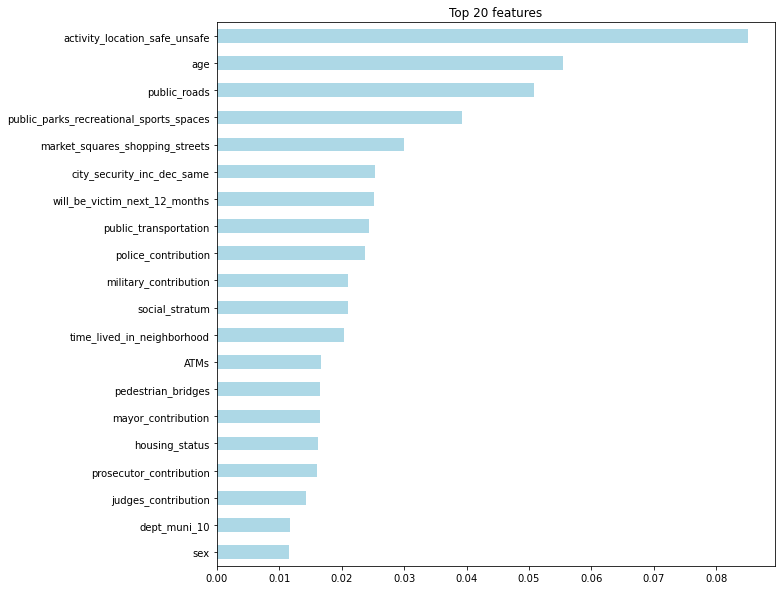

In [51]:
# Get feature importances

rf = pipeline.named_steps['randomforestclassifier']
importances = pd.Series(rf.feature_importances_, X_train.columns)

# Plot feature importances

%matplotlib inline
import matplotlib.pyplot as plt

n = 20
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='lightblue');

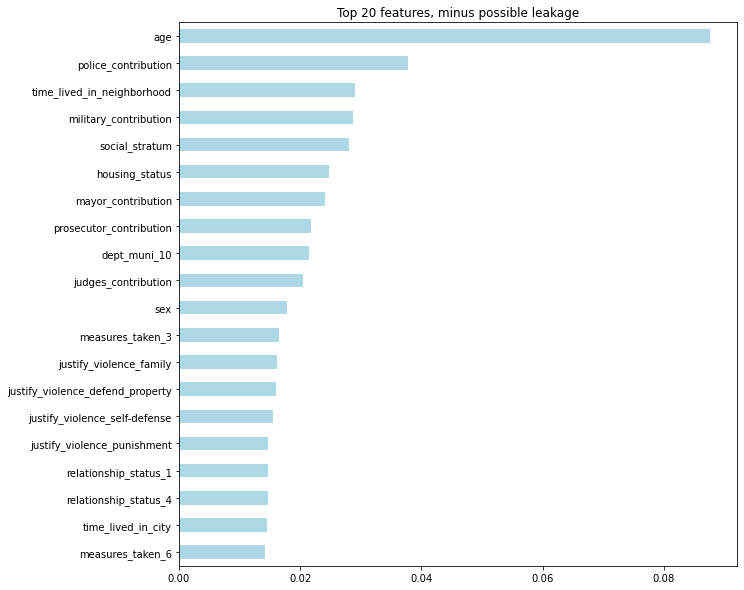

In [52]:
# Get feature importances

rf2 = pipeline2.named_steps['randomforestclassifier']
importances2 = pd.Series(rf2.feature_importances_, X_train2.columns)

# Plot feature importances

%matplotlib inline
import matplotlib.pyplot as plt

n = 20
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features, minus possible leakage')
importances2.sort_values()[-n:].plot.barh(color='lightblue');

In [55]:
imp = importances2.sort_values(ascending=True)[:10].index

# dept_muni_10 ='Montería'
# imp used on plotly dash

imp

Index(['dwelling_type_4', 'education_level_6', 'measures_taken_8',
       'activity_3', 'activity_4', 'dwelling_type_3', 'secure_housing',
       'income_group_3', 'activity_5', 'relationship_status_6'],
      dtype='object')

### Confusion Matrix

In [56]:
from sklearn.metrics import confusion_matrix

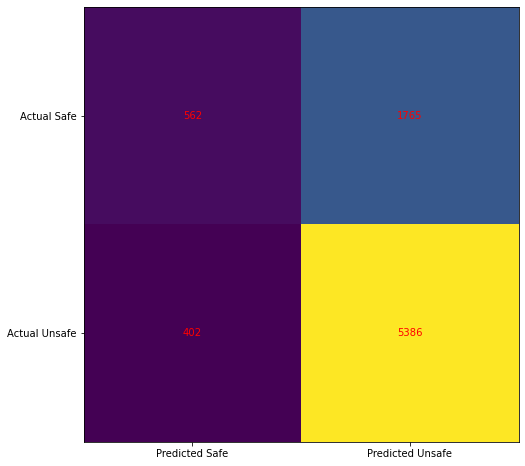

In [57]:
cm = confusion_matrix(y_val, model2.predict(X_val2))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted Safe', 'Predicted Unsafe'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual Safe', 'Actual Unsafe'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [58]:
from sklearn.metrics import classification_report
print(classification_report(y_val, model2.predict(X_val2)))

              precision    recall  f1-score   support

       False       0.58      0.24      0.34      2327
        True       0.75      0.93      0.83      5788

    accuracy                           0.73      8115
   macro avg       0.67      0.59      0.59      8115
weighted avg       0.70      0.73      0.69      8115



## PDP Plots

In [59]:
#!pip install pdpbox

In [60]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 72

from pdpbox.pdp import pdp_isolate, pdp_interact, pdp_plot, pdp_interact_plot

feature = 'age'

isolated = pdp_isolate(
    model=pipeline2,
    dataset=X_train2,
    model_features=X_val2.columns,
    feature=feature
)

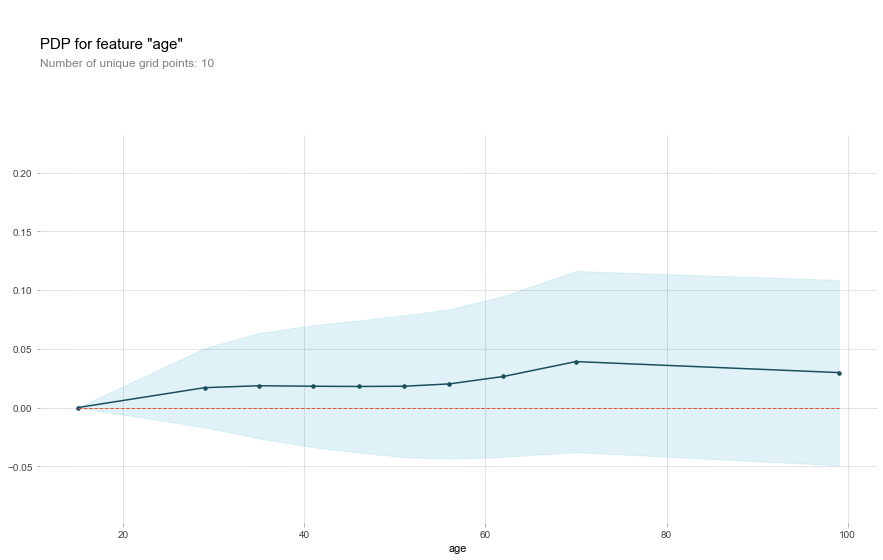

In [61]:
pdp_plot(isolated, feature_name=feature);

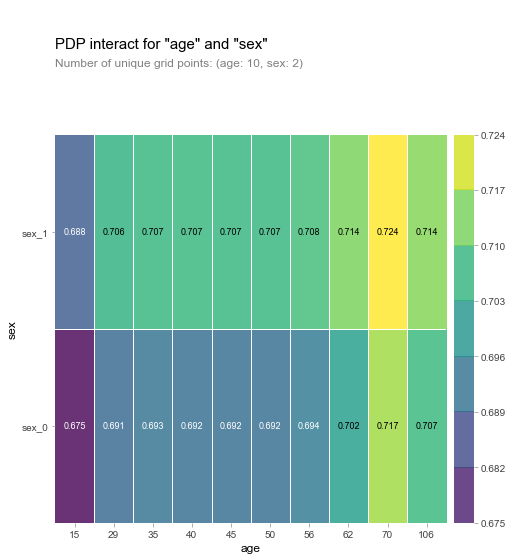

In [62]:
features = ['age', 'sex']

interaction = pdp_interact(
    model=pipeline2,
    dataset=X_val2,
    model_features=X_val2.columns,
    features=features
)

pdp_interact_plot(interaction, plot_type='grid', feature_names=features);

### ROC

Text(0.5, 0, 'False positive rate')

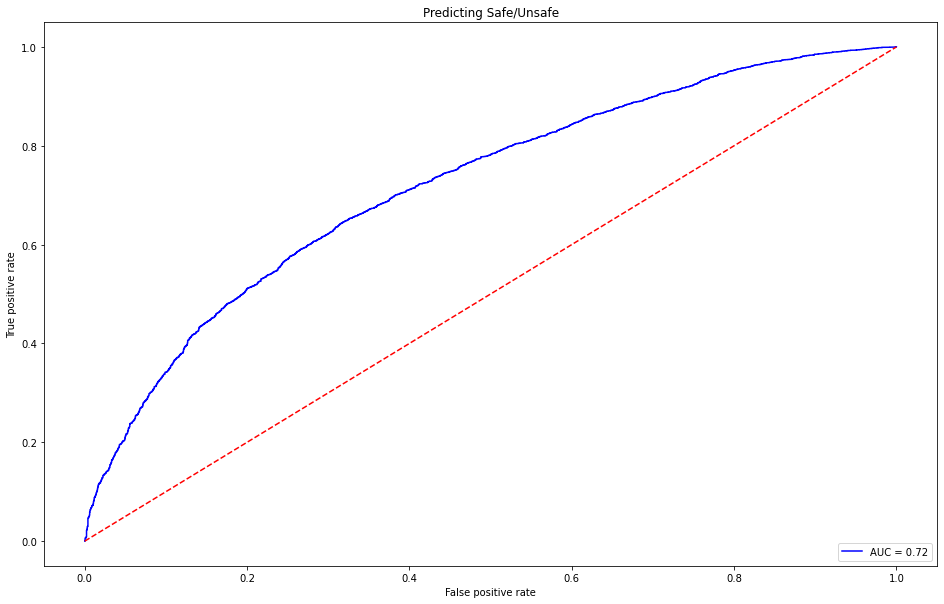

In [64]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

fpr,tpr, threshold = roc_curve(y_val.values,proba[:,1])
auc_val = auc(fpr,tpr)

plt.figure(figsize=(16,10))
plt.title('Predicting Safe/Unsafe')
plt.plot(fpr,tpr,'b',label = 'AUC = %0.2f' % auc_val)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')